# Fastest Lap Data
A Jupyter notebook looking at the fastest laps from each race. Using data from [Formula 1](https://www.formula1.com/en/results.html/2022/races.html)

The DataFrame 'fastest_lap' contains the mean (average) of the fastest laps of each driver in each race.

CSV files can be found in:
- data/fastest-laps

__HAVE YOU READ THE README FILE? PLEASE DO BEFORE USING THIS JUPYTER NOTEBOOK!__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import re
from datetime import datetime
import time

In [2]:
%matplotlib inline

In [3]:
cf.go_offline() #allows to use cufflinks offline

# Fastest Lap DataFrame management

In [4]:
fastest_lap = pd.DataFrame()

fastest_lap = fastest_lap.assign(NO = '', DRIVER = '', CAR = '', RACE = '', FL = '', AVG_SPEED = '')
# rename the column header
#fastest_lap.columns = fastest_lap.columns.str.replace('SPEED', 'AVG SPEED')

fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED


In [5]:
fastest_lap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NO         0 non-null      object
 1   DRIVER     0 non-null      object
 2   RACE       0 non-null      object
 3   FL         0 non-null      object
 4   AVG_SPEED  0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [6]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED


In [7]:
fastest_lap.describe()

,NO,DRIVER,RACE,FL,AVG_SPEED
count,0,0,0,0,0
unique,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN


In [24]:
# convert column to timedelta
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])

In [25]:
# get total seconds
fastest_lap['FL'] = fastest_lap['FL'].dt.total_seconds()

In [22]:
# get data by specific driver
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen'].mean()

/var/folders/4r/2hwrl7qs2hz_t4x5tc7910_m0000gn/T/ipykernel_11830/2161696142.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



NO             1.00
FL            87.74
AVG_SPEED    223.50
dtype: float64

In [26]:
# get data by specific driver
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
154,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,95.4,204.140
134,1,Max Verstappen,RED BULL RACING RBPT,SAUDI ARABIA,91.8,242.191
112,1,Max Verstappen,RED BULL RACING RBPT,AUSTRALIA,81.7,232.633
98,1,Max Verstappen,RED BULL RACING RBPT,ITALY,78.4,225.281
79,1,Max Verstappen,RED BULL RACING RBPT,MIAMI,91.4,213.255
56,1,Max Verstappen,RED BULL RACING RBPT,SPAIN,85.5,196.943
35,1,Max Verstappen,RED BULL RACING RBPT,MONACO,76.1,157.960
18,1,Max Verstappen,Red Bull Racing RBPT,AZERBAIJAN,106.1,203.779


In [27]:
fastest_lap.to_csv('data/compiled-data/fastest-laps.csv')

# Bahrain DataFrame management

In [5]:
fl_bahrain = pd.read_csv('data/fastest-lap/fl-bahrain.csv')
fl_bahrain.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,16,Charles Leclerc,FERRARI,51,19:31:35,01:34.6,206.018
1,2,1,Max Verstappen,RED BULL RACING RBPT,51,19:31:37,01:35.4,204.140
2,3,55,Carlos Sainz,FERRARI,52,19:33:13,01:35.7,203.501
3,4,11,Sergio Perez,RED BULL RACING RBPT,52,19:33:14,01:36.1,202.762
4,5,44,Lewis Hamilton,MERCEDES,53,19:34:51,01:36.2,202.469


In [6]:
fl_bahrain.describe()

,POS,NO,LAP,AVG SPEED
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,25.800000,49.050000,201.422450
std,5.91608,21.142623,5.889107,1.812899
min,1.00000,1.000000,34.000000,198.300000
25%,5.75000,10.750000,49.000000,200.495750
50%,10.50000,21.000000,51.000000,201.180000
75%,15.25000,34.250000,53.000000,202.352000
max,20.00000,77.000000,56.000000,206.018000


# Fastest Lap from Bahrain

In [7]:
# get the fastest lap of the race
fastest_lap_bahrain = fl_bahrain.loc[0, 'TIME']
fastest_lap_bahrain_time = datetime.strptime(fastest_lap_bahrain,'%M:%S.%f')
fastest_lap_bahrain_no = fl_bahrain.loc[0, 'NO']
fastest_lap_bahrain_driver = fl_bahrain.loc[0, 'DRIVER']
fastest_lap_bahrain_speed = fl_bahrain.loc[0, 'AVG SPEED']

fastest_lap_bahrain_time.strftime('%H:%M:%S.%f')[:-5]

'00:01:34.6'

In [8]:
# add fastest driver
# add row
fastest_lap.loc[-1] = [fastest_lap_bahrain_no, fastest_lap_bahrain_driver, 'BAHRAIN', fastest_lap_bahrain_time.strftime('%H:%M:%S.%f')[:-5], fastest_lap_bahrain_speed]
# shift the index
fastest_lap.index = fastest_lap.index + 1
fastest_lap.head()

ValueError: cannot set a row with mismatched columns

In [9]:
# convert column to timedelta
# RUN THIS AFTER ADDING ROW
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])

In [10]:
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED


# Fastest Lap Adding Data

In [11]:
driver_count = 0

while driver_count < len(fl_bahrain.index):
    time = fl_bahrain.loc[driver_count, 'TIME']
    driverNo = fl_bahrain.loc[driver_count, 'NO']
    name = fl_bahrain.loc[driver_count, 'DRIVER']
    avg_speed = fl_bahrain.loc[driver_count, 'AVG SPEED']
    car = fl_bahrain.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'BAHRAIN', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
19,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
18,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
17,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
16,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
15,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


In [ ]:
fastest_lap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 19 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   NO         20 non-null     int64          
 1   DRIVER     20 non-null     object         
 2   RACE       20 non-null     object         
 3   FL         20 non-null     timedelta64[ns]
 4   AVG_SPEED  20 non-null     float64        
dtypes: float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 960.0+ bytes


In [ ]:
fastest_lap.describe()

,NO,FL,AVG_SPEED
count,20.000000,20,20.000000
mean,25.800000,0 days 00:01:36.735000,201.422450
std,21.142623,0 days 00:00:00.874958645,1.812899
min,1.000000,0 days 00:01:34.600000,198.300000
25%,10.750000,0 days 00:01:36.275000,200.495750
50%,21.000000,0 days 00:01:36.850000,201.180000
75%,34.250000,0 days 00:01:37.150000,202.352000
max,77.000000,0 days 00:01:38.300000,206.018000


In [ ]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
19,16,Charles Leclerc,BAHRAIN,0 days 00:01:34.600000,206.018
18,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.140
17,55,Carlos Sainz,BAHRAIN,0 days 00:01:35.700000,203.501
16,11,Sergio Perez,BAHRAIN,0 days 00:01:36.100000,202.762
15,44,Lewis Hamilton,BAHRAIN,0 days 00:01:36.200000,202.469


In [ ]:
# get data by specific driver
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']

,NO,DRIVER,RACE,FL,AVG_SPEED
18,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.14


In [ ]:
#calculate the mean of the fastest laps and assign to variable
fl_mean = fastest_lap['FL'].mean()

In [ ]:
# display total seconds
fl_mean.total_seconds()

96.735

In [ ]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
19,16,Charles Leclerc,BAHRAIN,0 days 00:01:34.600000,206.018
18,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.140
17,55,Carlos Sainz,BAHRAIN,0 days 00:01:35.700000,203.501
16,11,Sergio Perez,BAHRAIN,0 days 00:01:36.100000,202.762
15,44,Lewis Hamilton,BAHRAIN,0 days 00:01:36.200000,202.469


# Saudi Arabia DataFrame management

In [12]:
fl_saudi_arabia = pd.read_csv('data/fastest-lap/fl-saudi-arabia.csv')
fl_saudi_arabia.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,16,Charles Leclerc,FERRARI,48,21:24:43,01:31.6,242.556
1,2,1,Max Verstappen,RED BULL RACING RBPT,50,21:27:46,01:31.8,242.191
2,3,55,Carlos Sainz,FERRARI,48,21:24:50,01:31.9,241.841
3,4,11,Sergio Perez,RED BULL RACING RBPT,46,21:21:47,01:32.0,241.481
4,5,4,Lando Norris,MCLAREN MERCEDES,46,21:22:26,01:32.8,239.629


In [13]:
driver_count = 0

while driver_count < len(fl_saudi_arabia.index):
    time = fl_saudi_arabia.loc[driver_count, 'TIME']
    driverNo = fl_saudi_arabia.loc[driver_count, 'NO']
    name = fl_saudi_arabia.loc[driver_count, 'DRIVER']
    avg_speed = fl_saudi_arabia.loc[driver_count, 'AVG SPEED']
    car = fl_saudi_arabia.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'SAUDI ARABIA', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
37,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
36,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
35,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
34,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
33,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Australia DataFrame management

In [14]:
fl_australia = pd.read_csv('data/fastest-lap/fl-australia.csv')
fl_australia.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,16,Charles Leclerc,FERRARI,58,16:30:59,01:20.3,236.740
1,2,14,Fernando Alonso,ALPINE RENAULT,57,16:31:30,01:20.8,235.024
2,3,11,Sergio Perez,RED BULL RACING RBPT,58,16:31:20,01:21.1,234.305
3,4,63,George Russell,MERCEDES,53,16:24:35,01:21.5,233.152
4,5,77,Valtteri Bottas,ALFA ROMEO FERRARI,54,16:26:39,01:21.7,232.707


In [15]:
fl_australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          19 non-null     int64  
 1   NO           19 non-null     int64  
 2   DRIVER       19 non-null     object 
 3   CAR          19 non-null     object 
 4   LAP          19 non-null     int64  
 5   TIME OF DAY  19 non-null     object 
 6   TIME         19 non-null     object 
 7   AVG SPEED    19 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ KB


In [16]:
len(fl_australia.index)

19

In [17]:
driver_count = 0

while driver_count < len(fl_australia.index):
    time = fl_australia.loc[driver_count, 'TIME']
    driverNo = fl_australia.loc[driver_count, 'NO']
    name = fl_australia.loc[driver_count, 'DRIVER']
    avg_speed = fl_australia.loc[driver_count, 'AVG SPEED']
    car = fl_australia.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'AUSTRALIA', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
56,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
55,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
54,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
53,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
52,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Italy DataFrame Management

In [18]:
fl_italy = pd.read_csv('data/fastest-lap/fl-italy.csv')
fl_italy.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,1,Max Verstappen,RED BULL RACING RBPT,55,16:24:32,01:18.4,225.281
1,2,16,Charles Leclerc,FERRARI,63,16:36:07,01:18.6,224.914
2,3,11,Sergio Perez,RED BULL RACING RBPT,52,16:20:46,01:18.9,223.845
3,4,47,Mick Schumacher,HAAS FERRARI,55,16:26:33,01:19.0,223.704
4,5,22,Yuki Tsunoda,ALPHATAURI RBPT,61,16:33:29,01:20.5,219.412


In [19]:
fl_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          19 non-null     int64  
 1   NO           19 non-null     int64  
 2   DRIVER       19 non-null     object 
 3   CAR          19 non-null     object 
 4   LAP          19 non-null     int64  
 5   TIME OF DAY  19 non-null     object 
 6   TIME         19 non-null     object 
 7   AVG SPEED    19 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ KB


In [20]:
driver_count = 0

while driver_count < len(fl_italy.index):
    time = fl_italy.loc[driver_count, 'TIME']
    driverNo = fl_italy.loc[driver_count, 'NO']
    name = fl_italy.loc[driver_count, 'DRIVER']
    avg_speed = fl_italy.loc[driver_count, 'AVG SPEED']
    car = fl_italy.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'ITALY', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
75,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
74,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
73,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
72,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
71,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Miami DataFrame Management

In [21]:
fl_miami = pd.read_csv('data/fastest-lap/fl-miami.csv')
fl_miami.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,1,Max Verstappen,RED BULL RACING RBPT,54,17:03:04,01:31.4,213.255
1,2,16,Charles Leclerc,FERRARI,53,17:01:34,01:31.5,212.959
2,3,55,Carlos Sainz,FERRARI,56,17:06:15,01:31.8,212.258
3,4,11,Sergio Perez,RED BULL RACING RBPT,54,17:03:13,01:31.8,212.191
4,5,63,George Russell,MERCEDES,56,17:06:25,01:32.2,211.325


In [22]:
driver_count = 0

while driver_count < len(fl_miami.index):
    time = fl_miami.loc[driver_count, 'TIME']
    driverNo = fl_miami.loc[driver_count, 'NO']
    name = fl_miami.loc[driver_count, 'DRIVER']
    avg_speed = fl_miami.loc[driver_count, 'AVG SPEED']
    car = fl_miami.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'MIAMI', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
95,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
94,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
93,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
92,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
91,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Spain DataFrame Management

In [23]:
fl_spain = pd.read_csv('data/fastest-lap/fl-spain.csv')
fl_spain.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,11,Sergio Perez,RED BULL RACING RBPT,55,16:25:00,01:24.1,200.099
1,2,44,Lewis Hamilton,MERCEDES,51,16:19:36,01:24.3,199.755
2,3,63,George Russell,MERCEDES,53,16:22:13,01:24.6,198.851
3,4,1,Max Verstappen,RED BULL RACING RBPT,46,16:11:38,01:25.5,196.943
4,5,4,Lando Norris,MCLAREN MERCEDES,53,16:23:01,01:25.6,196.568


In [24]:
driver_count = 0

while driver_count < len(fl_spain.index):
    time = fl_spain.loc[driver_count, 'TIME']
    driverNo = fl_spain.loc[driver_count, 'NO']
    name = fl_spain.loc[driver_count, 'DRIVER']
    avg_speed = fl_spain.loc[driver_count, 'AVG SPEED']
    car = fl_spain.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'SPAIN', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
115,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
114,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
113,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
112,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
111,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Monaco DataFrame Management

In [25]:
fl_monaco = pd.read_csv('data/fastest-lap/fl-monaco.csv')
fl_monaco.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,4,Lando Norris,MCLAREN MERCEDES,55,17:50:21,01:14.7,160.834
1,2,22,Yuki Tsunoda,ALPHATAURI RBPT,61,17:59:29,01:15.3,159.465
2,3,14,Fernando Alonso,ALPINE RENAULT,50,17:44:03,01:15.9,158.314
3,4,11,Sergio Perez,RED BULL RACING RBPT,46,17:38:05,01:16.0,158.010
4,5,1,Max Verstappen,RED BULL RACING RBPT,47,17:39:26,01:16.1,157.960


In [26]:
driver_count = 0

while driver_count < len(fl_monaco.index):
    time = fl_monaco.loc[driver_count, 'TIME']
    driverNo = fl_monaco.loc[driver_count, 'NO']
    name = fl_monaco.loc[driver_count, 'DRIVER']
    avg_speed = fl_monaco.loc[driver_count, 'AVG SPEED']
    car = fl_monaco.loc[driver_count, 'CAR']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'MONACO', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
135,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
134,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
133,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
132,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
131,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Azerbaijan DataFrame Management

In [27]:
fl_azerbaijan = pd.read_csv('data/fastest-lap/fl-azerbaijan.csv')
fl_azerbaijan.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,11,Sergio Perez,Red Bull Racing RBPT,36,16:11:32,01:46.0,203.787
1,2,1,Max Verstappen,Red Bull Racing RBPT,50,16:36:14,01:46.1,203.779
2,3,44,Lewis Hamilton,Mercedes,39,16:17:36,01:47.0,201.887
3,4,63,George Russell,Mercedes,42,16:22:38,01:47.2,201.636
4,5,22,Yuki Tsunoda,AlphaTauri RBPT,42,16:23:46,01:47.5,200.987


In [28]:
driver_count = 0

while driver_count < len(fl_azerbaijan.index):
    time = fl_azerbaijan.loc[driver_count, 'Time']
    driverNo = fl_azerbaijan.loc[driver_count, 'No']
    name = fl_azerbaijan.loc[driver_count, 'Driver']
    avg_speed = fl_azerbaijan.loc[driver_count, 'Avg Speed']
    car = fl_azerbaijan.loc[driver_count, 'Car']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'AZERBAIJAN', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
155,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:01:34.600000,206.018
154,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:35.400000,204.140
153,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:01:35.700000,203.501
152,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:01:36.100000,202.762
151,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:01:36.200000,202.469


# Canada DataFrame Management

In [38]:
fl_canada = pd.read_csv('data/fastest-lap/fl-canada.csv')
fl_canada.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,55,Carlos Sainz,Ferrari,63,15:30:43,01:15.7,207.258
1,2,1,Max Verstappen,Red Bull Racing RBPT,64,15:31:59,01:15.8,207.012
2,3,16,Charles Leclerc,Ferrari,62,15:29:37,01:15.9,206.843
3,4,44,Lewis Hamilton,Mercedes,69,15:38:25,01:16.2,206.120
4,5,63,George Russell,Mercedes,63,15:30:51,01:16.4,205.443


In [39]:
driver_count = 0

while driver_count < len(fl_canada.index):
    time = fl_canada.loc[driver_count, 'Time']
    driverNo = fl_canada.loc[driver_count, 'No']
    name = fl_canada.loc[driver_count, 'Driver']
    avg_speed = fl_canada.loc[driver_count, 'Avg Speed']
    car = fl_canada.loc[driver_count, 'Car']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, car, 'CANADA', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
175,16,Charles Leclerc,FERRARI,BAHRAIN,0 days 00:00:00.000000094,206.018
174,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,0 days 00:00:00.000000095,204.140
173,55,Carlos Sainz,FERRARI,BAHRAIN,0 days 00:00:00.000000095,203.501
172,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,0 days 00:00:00.000000096,202.762
171,44,Lewis Hamilton,MERCEDES,BAHRAIN,0 days 00:00:00.000000096,202.469


# Plotting Work

<AxesSubplot:title={'center':'Max Verstappen'}, xlabel='RACE'>

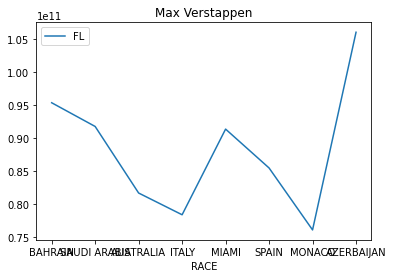

In [29]:
#avg speed
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen'].plot.line(x='RACE', y='FL', title='Max Verstappen')

In [30]:
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']['FL']

154   0 days 00:01:35.400000
134   0 days 00:01:31.800000
112   0 days 00:01:21.700000
98    0 days 00:01:18.400000
79    0 days 00:01:31.400000
56    0 days 00:01:25.500000
35    0 days 00:01:16.100000
18    0 days 00:01:46.100000
Name: FL, dtype: timedelta64[ns]

# Experiment to convert TimeDelta to seconds

In [31]:
test_df = fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']['FL']

In [32]:
test_df.head()

154   0 days 00:01:35.400000
134   0 days 00:01:31.800000
112   0 days 00:01:21.700000
98    0 days 00:01:18.400000
79    0 days 00:01:31.400000
Name: FL, dtype: timedelta64[ns]

In [33]:
test_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 8 entries, 154 to 18
Series name: FL
Non-Null Count  Dtype          
--------------  -----          
8 non-null      timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 128.0 bytes


In [34]:
test_df = test_df.dt.total_seconds()

In [35]:
test_df_2 = fastest_lap

In [36]:
test_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 155 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   NO         156 non-null    int64          
 1   DRIVER     156 non-null    object         
 2   CAR        156 non-null    object         
 3   RACE       156 non-null    object         
 4   FL         156 non-null    timedelta64[ns]
 5   AVG_SPEED  156 non-null    float64        
dtypes: float64(1), int64(1), object(3), timedelta64[ns](1)
memory usage: 8.5+ KB


In [37]:
test_df_2['FL'] = test_df_2['FL'].dt.total_seconds()